## INTRODUCTION TO THE ANALYSIS
1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the authors
      using a linear regression method.  See their article (pp 308-313) for
      more details on how the relative performance values were set.

5. Number of Instances: 209 

6. Number of Attributes: 10 (6 predictive attributes, 2 non-predictive, 
                             1 goal field, and the linear regression's guess)

7. Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)

8. Missing Attribute Values: None

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#Loading the dataset in a clean data frame format
dt=pd.read_csv('machine.data',header=None,index_col=False)
dt.columns=['vendor_name','Model_name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']
dt.head()

,vendor_name,Model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
#Checking if the dataframe was imported fully and if there is missing values.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
Model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [4]:
dt.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


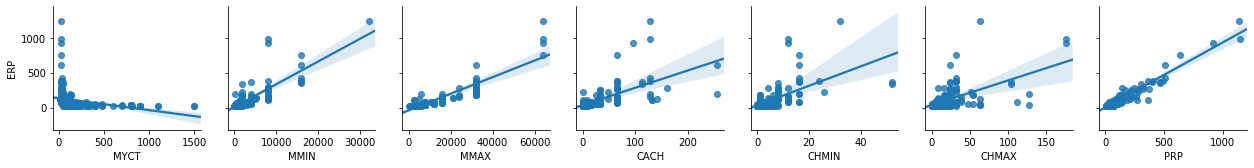

In [5]:
#Since the data was imported fully now lets perform some visualizations
sns.pairplot(dt,x_vars=['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP'],y_vars='ERP',kind='reg')

In [6]:
#We need to construct a correlation matrix to get features that affect the ERP
#Multicollinearity test
multcor=dt.corr()
print(multcor)

           MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX       PRP  \
MYCT   1.000000 -0.335642 -0.378561 -0.321000 -0.301090 -0.250502 -0.307099   
MMIN  -0.335642  1.000000  0.758157  0.534729  0.517189  0.266907  0.794931   
MMAX  -0.378561  0.758157  1.000000  0.537990  0.560513  0.527246  0.863004   
CACH  -0.321000  0.534729  0.537990  1.000000  0.582245  0.487846  0.662641   
CHMIN -0.301090  0.517189  0.560513  0.582245  1.000000  0.548281  0.608903   
CHMAX -0.250502  0.266907  0.527246  0.487846  0.548281  1.000000  0.605209   
PRP   -0.307099  0.794931  0.863004  0.662641  0.608903  0.605209  1.000000   
ERP   -0.288396  0.819292  0.901202  0.648620  0.610580  0.592156  0.966472   

            ERP  
MYCT  -0.288396  
MMIN   0.819292  
MMAX   0.901202  
CACH   0.648620  
CHMIN  0.610580  
CHMAX  0.592156  
PRP    0.966472  
ERP    1.000000  


In [7]:
#Feature selection
q=dt[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]

In [8]:
q.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [9]:
x=dt[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]

In [10]:
y=dt['ERP'].values.reshape(-1,1)

In [11]:
exog=sm.add_constant(x)
est=sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     679.5
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          3.60e-136
Time:                        18:20:56   Log-Likelihood:                -1014.8
No. Observations:                 209   AIC:                             2046.
Df Residuals:                     201   BIC:                             2072.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.2296      4.732     -7.234      0.0

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
#Eliminating the variables that do not seem to have less impact on ERP
x_new=dt[['MYCT','MMIN','MMAX','CHMAX','PRP']]

In [13]:
exog=sm.add_constant(x_new)
est=sm.OLS(y,exog).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     947.3
Date:                Thu, 06 Jan 2022   Prob (F-statistic):          1.47e-138
Time:                        18:20:56   Log-Likelihood:                -1016.3
No. Observations:                 209   AIC:                             2045.
Df Residuals:                     203   BIC:                             2065.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.5412      4.620     -7.044      0.0

### Althought the adjusted R-squared has not improved,the f-statistics seems to have increased.

## The final model is :
### Y_predicted=-32.5412+0.0352MYCT+0.0056MMIN+0.0033MMAX+0.3772CHMAX+0.5962PRP